In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

# importando dados
test = pd.read_csv('data/test.csv')
train = pd.read_csv('data/train.csv')

# analisando dataframes
print('Treino ->',train.shape)
print('Teste ->',test.shape)

Treino -> (891, 12)
Teste -> (418, 11)


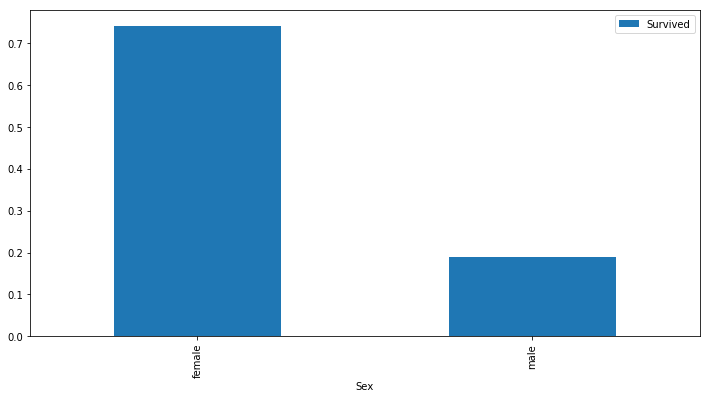

In [2]:
# análise coluna Sex
sex_pivot = train.pivot_table(index='Sex',values='Survived')
sex_pivot.plot.bar(figsize=(12,6))
plt.show()

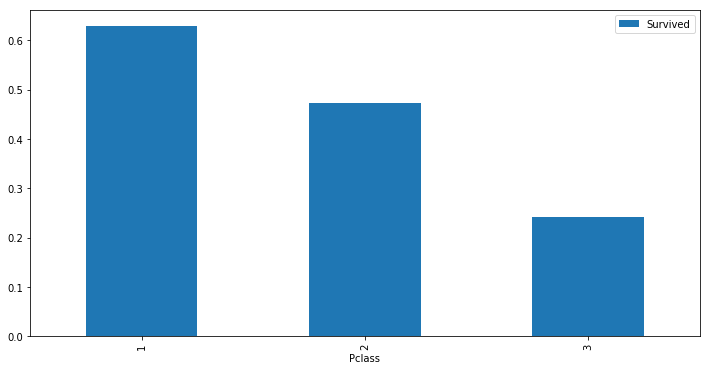

In [3]:
# análise coluna Pclass
class_pivot = train.pivot_table(index="Pclass",values="Survived")
class_pivot.plot.bar(figsize=(12,6))
plt.show()

In [4]:
#verificando a distribuição de idades no treino
print(train["Age"].describe())

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64


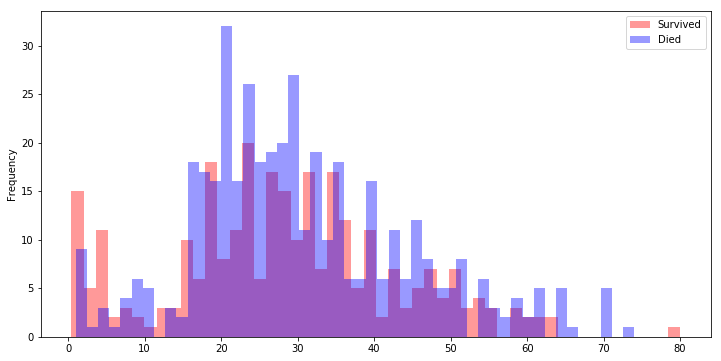

In [5]:
# criando um histograma para visualizar como foi o grau de sobrevivência de acordo com as idades
survived = train[train["Survived"] == 1]
died = train[train["Survived"] == 0]
survived["Age"].plot.hist(alpha=0.4,color='red',bins=50,figsize=(12,6))
died["Age"].plot.hist(alpha=0.4,color='blue',bins=50)
plt.legend(['Survived','Died'])
plt.show()

In [6]:
# para facilitar o trabalhodo algoritmo, vamos criar ranges fixos de idades.
# e ao mesmo tempo vamos tratar os missing values
def process_age(df,cut_points,label_names):
    df["Age"] = df["Age"].fillna(-0.5)
    df["Age_categories"] = pd.cut(df["Age"],cut_points,labels=label_names)
    return df

In [7]:
cut_points = [-1,0,5,12,18,35,60,100]
label_names = ["Missing","Infant","Child","Teenager","Young Adult","Adult","Senior"]

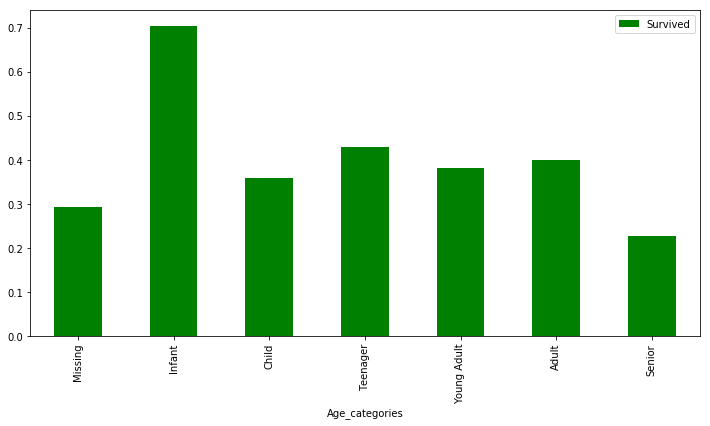

In [8]:
train = process_age(train,cut_points,label_names)
test = process_age(test,cut_points,label_names)

pivot = train.pivot_table(index="Age_categories",values='Survived')
pivot.plot.bar(color='g',figsize=(12,6))
plt.show()

In [9]:
#removendo a relação numerica presente na coluna P class
def create_dummies(df,column_name):
    dummies = pd.get_dummies(df[column_name],prefix=column_name)
    df = pd.concat([df,dummies],axis=1)
    return df

for column in ["Pclass","Sex","Age_categories"]:
    train = create_dummies(train,column)
    test = create_dummies(test,column)

In [10]:
#criando um objeto LogistcRegression
lr = LogisticRegression(solver='lbfgs')

In [11]:
#treinando o modelo
columns = ['Pclass_2', 'Pclass_3', 'Sex_male']
lr.fit(train[columns], train['Survived'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [12]:
columns = ['Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_female', 'Sex_male',
'Age_categories_Missing','Age_categories_Infant',
'Age_categories_Child', 'Age_categories_Teenager',
'Age_categories_Young Adult', 'Age_categories_Adult',
'Age_categories_Senior']

In [13]:
lr = LogisticRegression(solver='lbfgs')
lr.fit(train[columns], train["Survived"])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [14]:
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
verbose=0, warm_start=False)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [15]:
#avaliando o modelo
holdout = test

all_X = train[columns]
all_y = train['Survived']

train_X, test_X, train_y, test_y = train_test_split(
all_X, all_y, test_size=0.20,random_state=0)

In [16]:
lr = LogisticRegression(solver='lbfgs')
lr.fit(train_X, train_y)
predictions = lr.predict(test_X)

In [17]:
accuracy = accuracy_score(test_y, predictions)

print(accuracy)

0.8100558659217877


In [19]:
# usando cross validation para um medida de erro mais precisa
lr = LogisticRegression(solver='lbfgs')
scores = cross_val_score(lr, all_X, all_y, cv=10)
scores.sort()
accuracy = scores.mean()

print(scores)
print(accuracy)

[0.76404494 0.76404494 0.7752809  0.78651685 0.8        0.80681818
 0.80898876 0.81111111 0.83146067 0.87640449]
0.8024670865963002


In [21]:
# fazendo previsões usando novos dados
lr = LogisticRegression(solver='lbfgs')
lr.fit(all_X,all_y)
holdout_predictions = lr.predict(holdout[columns])

In [22]:
test = pd.read_csv("data/test.csv")
train = pd.read_csv("data/train.csv")

In [23]:
#retirando os dados irrelevantes
train.drop(['Name','Ticket','Cabin'], axis = 1, inplace = True)
test.drop(['Name','Ticket','Cabin'], axis = 1, inplace = True)

In [24]:
# fazendo uso dos dummies de novo
new_data_train = pd.get_dummies(train)
new_data_test = pd.get_dummies(test)

In [25]:
new_data_train.isnull().sum().sort_values(ascending = False).head(10)

Age           177
Embarked_S      0
Embarked_Q      0
Embarked_C      0
Sex_male        0
Sex_female      0
Fare            0
Parch           0
SibSp           0
Pclass          0
dtype: int64

In [26]:
# tratando valores nulos encontrados
new_data_train['Age'].fillna(new_data_train['Age'].mean(), inplace = True)
new_data_test['Age'].fillna(new_data_test['Age'].mean(), inplace = True)

new_data_test.isnull().sum().sort_values(ascending = False).head(10)

new_data_test['Fare'].fillna(new_data_test['Fare'].mean(), inplace = True)

In [27]:
# separado as features para a criação do modelo
X = new_data_train.drop("Survived", axis = 1) #tirando apenas a coluna target
y = new_data_train["Survived"] # colocando somente a coluna target

tree = DecisionTreeClassifier(max_depth = 3, random_state = 0)
tree.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [28]:
# avaliando o modelo
print('Tree (score) ->',tree.score(X,y))


Tree (score) -> 0.8271604938271605


In [29]:
# gerando prediction arquivo para submissao
previsao = pd.DataFrame()
previsao["PassengerId"] = new_data_test["PassengerId"]
previsao["Survived"] = tree.predict(new_data_test)

previsao.to_csv('prediction.csv',index = False)